In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Datasets/CIfar_10 dataset.zip"

In [ ]:
from zipfile import ZipFile

with ZipFile(filepath) as f:
  f.extractall("/content/drive/MyDrive/Colab Notebooks/Datasets/cifar10data")
  print("Data extracted")

Data extracted


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/cifar1.h5")
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 18)        1368      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 18)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 18)        2934      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 18)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 36)          5868      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 36)        

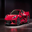

In [5]:
img = Image.open("/content/drive/MyDrive/test.jpeg")
img = img.resize((32,32))
img

In [6]:
test = tf.reshape(np.array(img)/255, (-1,32,32,3))
preds = model.predict(test, verbose=False)[0]*100
preds = tf.math.round(preds)
print(preds)

confidence = tf.reduce_max(preds)
index = int(tf.where(preds == confidence)[0][0])
print(index)

pred = classes[index]

print(pred.title(),int(confidence),"%")

tf.Tensor([  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.], shape=(10,), dtype=float32)
1
Automobile 100 %
